In [97]:
%matplotlib inline
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt


torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())       

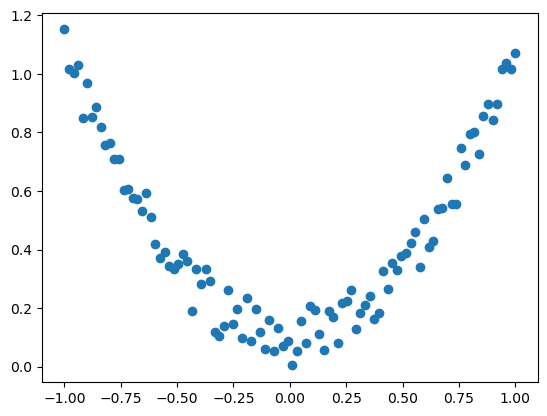

In [98]:
plt.scatter(x.numpy(), y.numpy())

## 搭建两层含有bias的全连接网络，隐藏层输出个数为20，激活函数都用sigmoid()

In [99]:
import torch.nn as nn
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.Two_Layer = nn.Sequential(
            nn.Linear(n_feature, n_hidden, bias=True), nn.Sigmoid(),
            nn.Linear(n_hidden, n_output, bias=True),)
    def forward(self, x):
        x = self.Two_Layer(x)
        return x

Net(
  (Two_Layer): Sequential(
    (0): Linear(in_features=1, out_features=20, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=20, out_features=1, bias=True)
  )
)


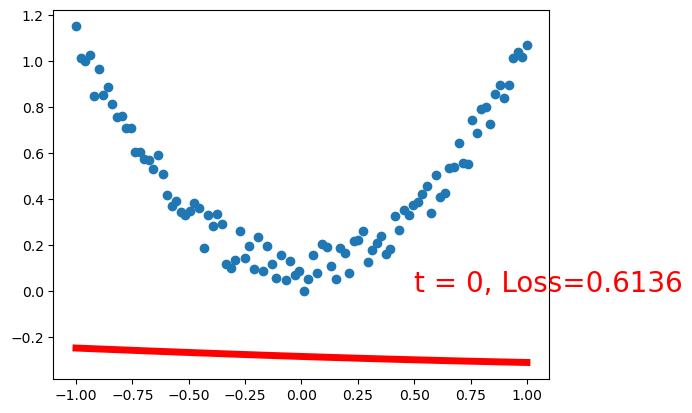

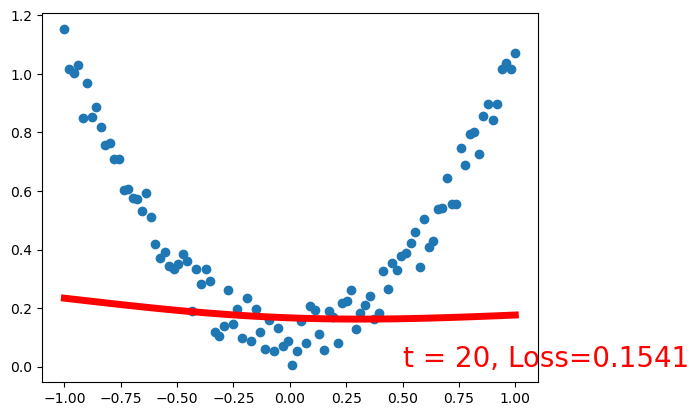

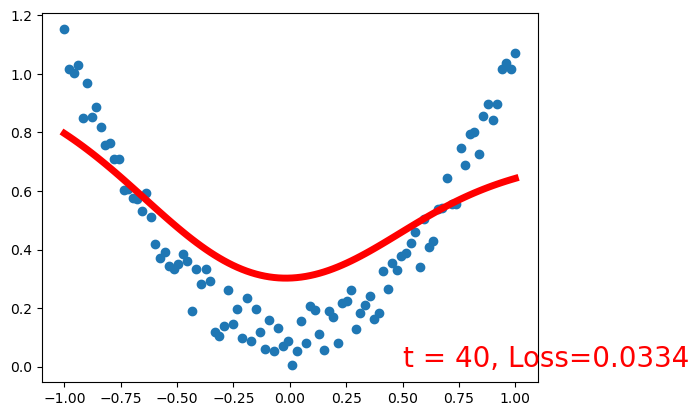

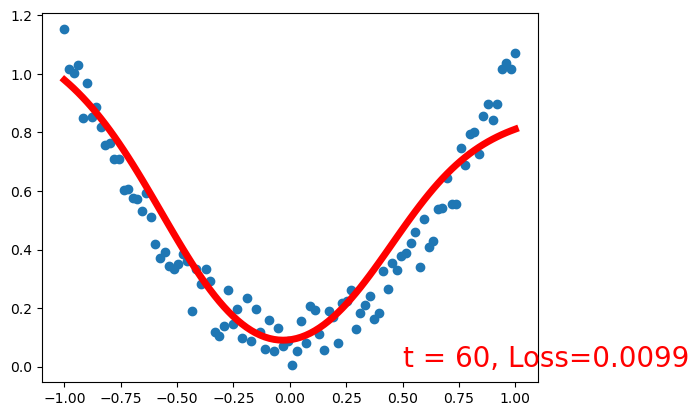

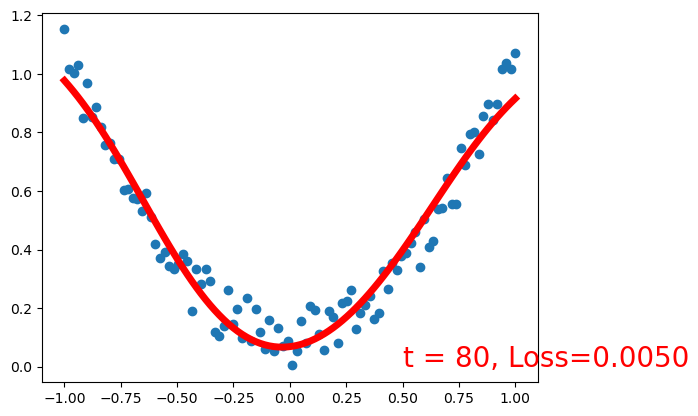

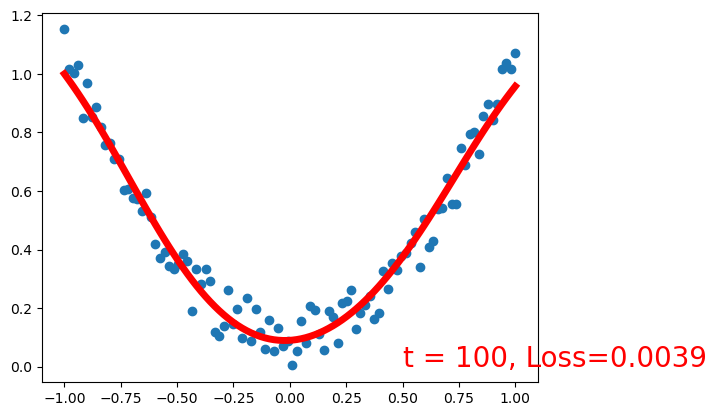

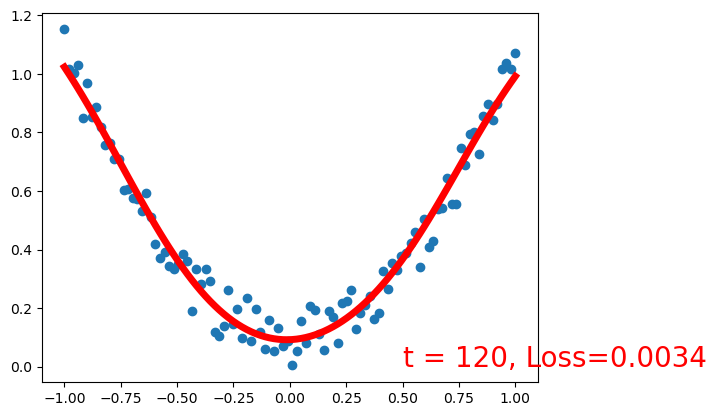

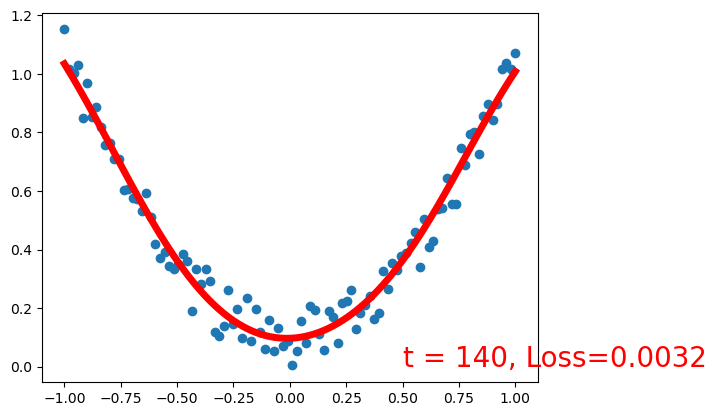

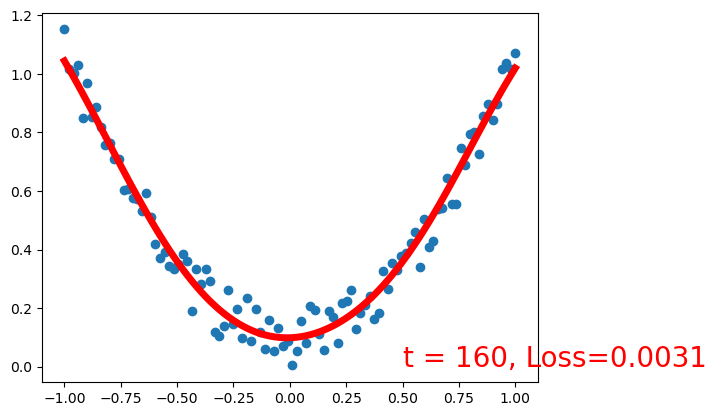

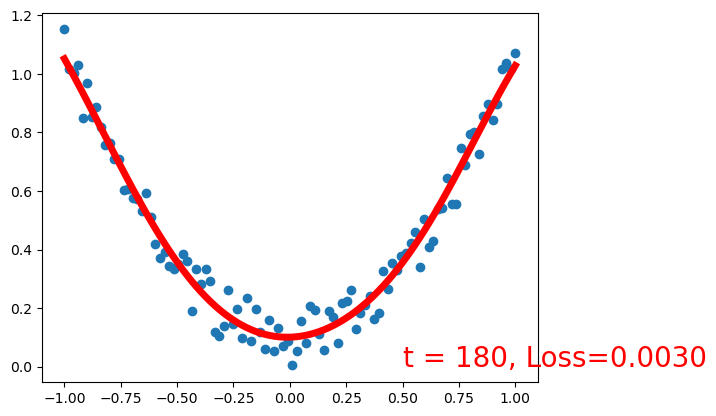

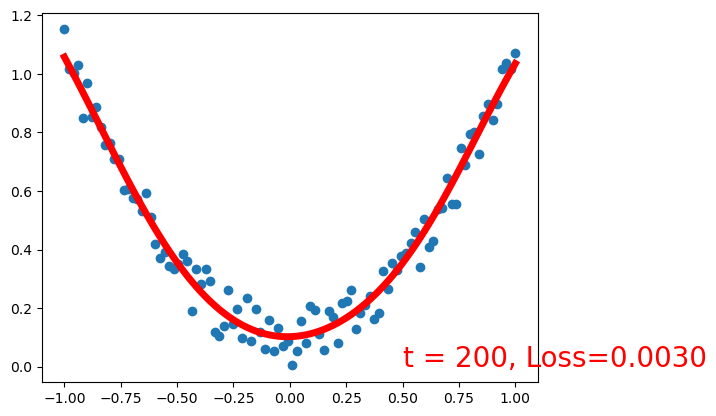

In [100]:
net = Net(n_feature=1, n_hidden=20, n_output=1)     # define the network
print(net)  # net architecture
optimizer = torch.optim.Adam(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(201):
    prediction = net(x)     # input x and predict based on x
    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 20 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 't = %d, Loss=%.4f' % (t, loss.data.numpy()), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
        plt.show()

plt.ioff()
# plt.show()

In [101]:
# 变量w1, w2, b1, b2公式及验证如下：
w1 = torch.randn(1,20, requires_grad=True)
b1 = torch.randn(20, requires_grad=True)
w2 = torch.randn(20,1, requires_grad=True)
b2 = torch.randn(1, requires_grad=True)
h = x.mm(w1) + b1
h_sigmoid = 1 / (1 + torch.exp(-h))
y_p = h_sigmoid.mm(w2) + b2
f = (y - y_p).pow(2).sum()

f.backward()
w2_grad = 2 * (h_sigmoid.T) @ (y_p - y)
b2_grad = (2 * (y_p - y)).sum()
w1_grad = 2 *(x.T) @ (((y_p - y) @ (w2.T)) * ((torch.exp(-h))/((1+torch.exp(-h))**2)))
b1_grad = 2 *(((y_p - y) @ (w2.T)) * ((torch.exp(-h))/((1+torch.exp(-h))**2))).sum(dim=0)

print(f"W2.grad in torch:{w2.grad} \n",f"W2.grad by manual:{w2_grad} \n")
print(f"b2.grad in torch:{b2.grad} \n",f"b2.grad by manual:{b2_grad} \n")
print(f"W1.grad in torch:{w1.grad} \n",f"W1.grad by manual:{w1_grad} \n")
print(f"b1.grad in torch:{b1.grad} \n",f"b1.grad by manual:{b1_grad} \n")

W2.grad in torch:tensor([[ 68.4265],
        [ 28.6606],
        [182.4895],
        [119.9538],
        [290.2801],
        [170.8393],
        [410.5288],
        [297.6701],
        [433.8986],
        [200.5453],
        [299.5905],
        [416.9143],
        [291.1715],
        [318.6634],
        [ 73.9749],
        [208.6766],
        [199.7782],
        [284.4449],
        [290.7626],
        [244.6737]]) 
 W2.grad by manual:tensor([[ 68.4265],
        [ 28.6606],
        [182.4895],
        [119.9538],
        [290.2801],
        [170.8393],
        [410.5288],
        [297.6701],
        [433.8986],
        [200.5453],
        [299.5905],
        [416.9143],
        [291.1715],
        [318.6634],
        [ 73.9749],
        [208.6766],
        [199.7782],
        [284.4449],
        [290.7626],
        [244.6737]], grad_fn=<MmBackward0>) 

b2.grad in torch:tensor([496.7329]) 
 b2.grad by manual:496.73291015625 

W1.grad in torch:tensor([[  4.8525,   1.3851,  11.6098,  -0.15